# Projet 1 - Classification Model

### Projet made by :

#### 
* Cosmin Trandafir - 57101
* Martim Baptista - 56323
* João Serafim - 56376
* Martim Paraíba - 56273
***

### In this project we will use dataset: ***biodegradable_a.cvs*** 

In [38]:
import pandas as pd

#Load biodegradable dataset

bio_df = pd.read_csv("biodegradable_a.csv")
#bio_df.info()

## Generic functions and Imports

In [39]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, PowerTransformer
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, classification_report, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Function that prints classification scores

In [40]:
def classification_scores(y_test, y_pred):
    # Evaluate the performance of the model using various metrics
    print(classification_report(y_test, y_pred, target_names=['RB', 'NRB']))
    print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(y_test, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


Function that returns MCC score(used to compare scalers and imputers combinations)

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Returns mean crossvalidation score
def evaluate_model(imputer_tuple, scaler_tuple, classifier, X_train, X_test, y_train):
    imputer = imputer_tuple[1]
    # Impute missing values
    imputer.fit(X_train)
    X_train_imputed = imputer.transform(X_train)
    X_test_imputed = imputer.transform(X_test)
    
    scaler = scaler_tuple[1]
    # Scale the test data
    scaler.fit(X_train_imputed)
    X_train_scaled = scaler.transform(X_train_imputed)
    X_test_scaled = scaler.transform(X_test_imputed)
    
    # Train the classifier
    classifier.fit(X_train_scaled, y_train)
    preds = classifier.predict(X_test_scaled)
    
    mcc = matthews_corrcoef(y_test, preds)
    
    # Compute cross-validation scores
    cv_scores = cross_val_score(classifier, X_test_scaled, y_test, cv=10)
    mean_cv_score = cv_scores.mean()
    
    # lines of code that prints the classification scores of each imputer and scaler combination
    # MCC
    # print(f'\nImputer: {imputer_tuple[0]} \nScaler: {scaler_tuple[0]} \nMCC Score: {mcc}')
    # classification_scores(y_test, preds)
    # CrossValidation Scores
    # print("Imputer: {} \nScaler: {}\nCrossValidationScore: {:.6f}\n".format(imputer_tuple[0], scaler_tuple[0], mean_cv_score))
    
    return mcc


## Inicialization 

Encoding the RB and NRB classes to 0 and 1 values

In [42]:
from sklearn import preprocessing
# Divide Freatures and Class columns for preprocessing
X = bio_df.iloc[:, :-1]
y = bio_df.iloc[:, -1]

# Encode string classes to a numeric value
le = preprocessing.LabelEncoder()
df_encoded_classes = le.fit_transform(y)


## Data Imputation and Scaling


***
### Combinations of 
#### Imputers: 
- SimpleImputer with mean strategy
- SimpleImputer with median strategy
- KNNImputer with 3 nearest neighbors
- KNNImputer with 5 nearest neighbors
- KNNImputer with 7 nearest neighbors
- KNNImputer with 9 nearest neighbors
- KNNImputer with 11 nearest neighbors
- IterativeImputer

#### With Scalers:
- MinMaxScaler
- StandardScaler
- Normalizer
- PowerTransformer

In [43]:
# X_search and y_search will be used to check the best imputer, scaler and selector, 
# X_final and y_final will be used in the end to test the selected pipeline
X_search, X_final, y_search, y_final = train_test_split(X, df_encoded_classes, test_size=0.2, random_state=0)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_search, y_search, test_size=0.33, random_state=42)
# List of imputers to test (imputer_name, imputer)
imputers =[("SimpleImputer = mean", SimpleImputer(strategy='mean')), 
           ("SimpleImputer = median", SimpleImputer(strategy='median')), 
           ("KNNImputer 3",KNNImputer(n_neighbors=3)), 
           ("KNNImputer 5",KNNImputer(n_neighbors=5)), 
           ("KNNImputer 7",KNNImputer(n_neighbors=7)), 
           ("KNNImputer 9",KNNImputer(n_neighbors=9)),
           ("KNNImputer 11",KNNImputer(n_neighbors=11)),
           # random state to use same iteration for different runs
           ("IterativeImputer",IterativeImputer(random_state=0))]

# List of scalers to test (scaler_name, scaler)
scalers = [("MinMaxScaler",MinMaxScaler()), 
           ("StandarScaler",StandardScaler()), 
           ("Normalizer",Normalizer()), 
           ("PowerTransformer",PowerTransformer())]

# List of combinations of imputer and scaler names to user in graph
combos = [imputer_name + " + " + scaler_name for imputer_name, imputer in imputers for scaler_name, scaler in scalers]

# List of MCC scores for every combination of imputers and scalers
scores = []

for imputer in imputers:
    for scaler in scalers:
        # Storing scores in list
        # random state to use same iteration for different runs
        scores.append(evaluate_model(imputer, scaler, LogisticRegression(max_iter=10000, random_state=42), X_train, X_test, y_train))



Imputer: SimpleImputer = mean 
Scaler: MinMaxScaler 
MCC Score: 0.7139481692937144

Imputer: SimpleImputer = mean 
Scaler: StandarScaler 
MCC Score: 0.7866530628636742

Imputer: SimpleImputer = mean 
Scaler: Normalizer 
MCC Score: 0.4041416252245304

Imputer: SimpleImputer = mean 
Scaler: PowerTransformer 
MCC Score: 0.7168420539938234

Imputer: SimpleImputer = median 
Scaler: MinMaxScaler 
MCC Score: 0.710163310192539

Imputer: SimpleImputer = median 
Scaler: StandarScaler 
MCC Score: 0.7897663071153472

Imputer: SimpleImputer = median 
Scaler: Normalizer 
MCC Score: 0.40996730682776716

Imputer: SimpleImputer = median 
Scaler: PowerTransformer 
MCC Score: 0.7264453487500617

Imputer: KNNImputer 3 
Scaler: MinMaxScaler 
MCC Score: 0.7290726351039682

Imputer: KNNImputer 3 
Scaler: StandarScaler 
MCC Score: 0.7902383788689807

Imputer: KNNImputer 3 
Scaler: Normalizer 
MCC Score: 0.4168800677669201

Imputer: KNNImputer 3 
Scaler: PowerTransformer 
MCC Score: 0.7502040198461677

Impute

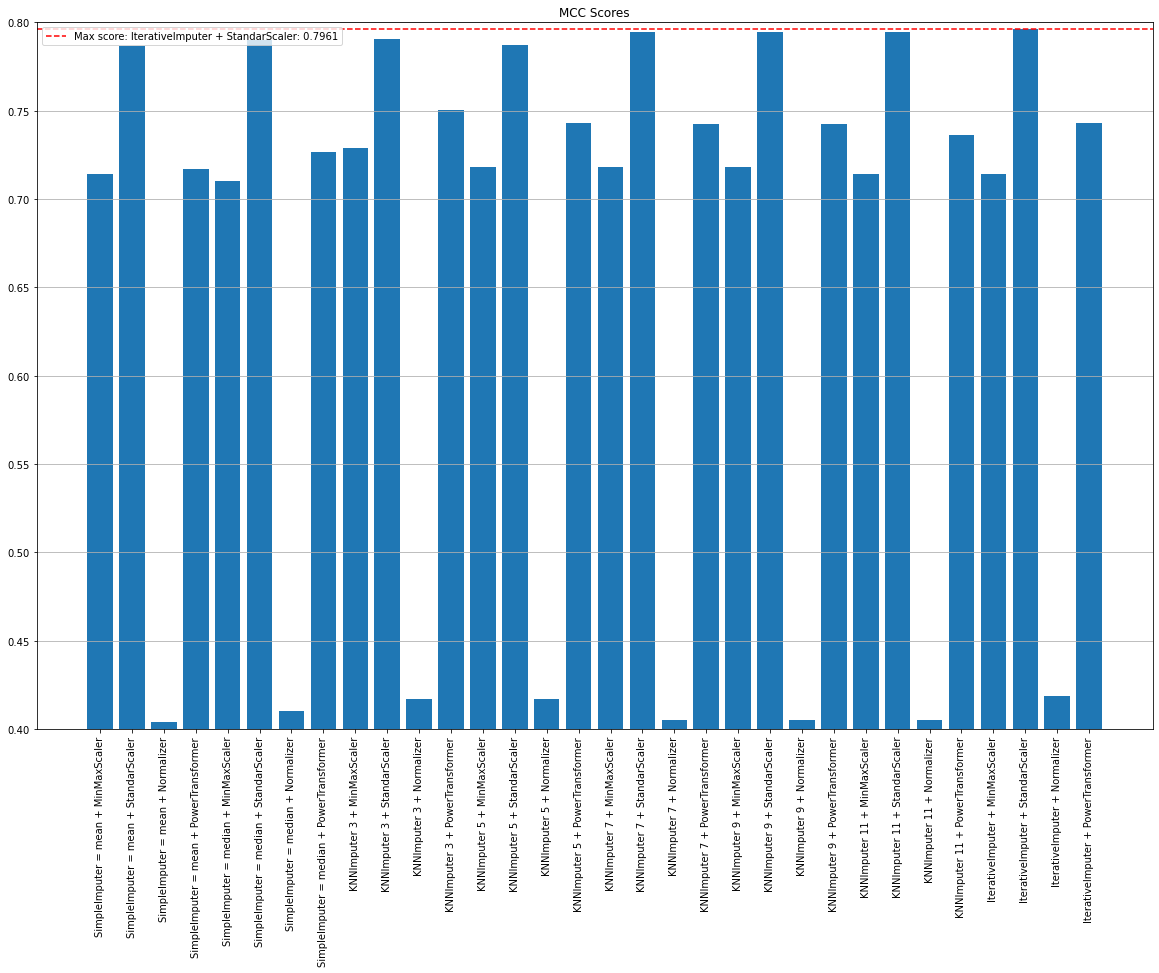

In [45]:
# figsize to adjust size 
fig, ax = plt.subplots(figsize=(20, 13))
ax.bar(combos, scores)
ax.set_title('MCC Scores')

# Set boundries for y axis 
ax.set_ylim([0.4, 0.8])
ax.grid(axis='y')

# Make labels visible
ax.set_xticklabels(combos, rotation=90, ha='center')

# Calculate and show line of max score
max_score_idx = np.argmax(scores)
highest_name, highest_score = combos[max_score_idx], scores[max_score_idx]
ax.axhline(y=scores[max_score_idx], color='r', linestyle='--', label='Max score')

ax.legend([f'Max score: {highest_name}: {highest_score:.4f}'])

plt.show()


## Feature Selection

***
### Prepare dataset using best Imputer and Scaler
 

In [46]:
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

# Impute missing values
imputer = IterativeImputer(random_state=42)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)



***
### Pearson Correlation between each feature and target classification

In [47]:
# Feature selection using Pearson correlation
corr_coef = np.corrcoef(np.hstack((y_train.reshape((-1, 1)), X_train_scaled)).T)

#Select features with correlation coeficient above 0 (coeficients between each feature and the classification)
corr_features_idx = np.where(corr_coef[0, 1:] > 0)[0]
X_train_corr = X_train_scaled[:, corr_features_idx]
X_test_corr = X_test_scaled[:, corr_features_idx]


print(f'{len(corr_features_idx)} features have a correlation above 0')

8 features have a correlation above 0


***
### PCA

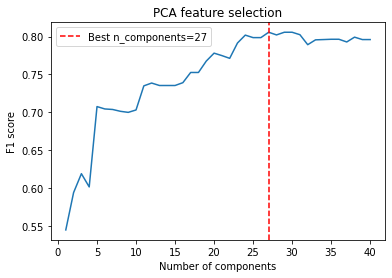

In [48]:
# Feature selection using PCA

# Define the range of number of components to test
n_components_range = range(1, 41)

# Evaluate the models using logistic regression with MCC score
lr = LogisticRegression(random_state=42)
mcc_scores = []
for n_components in n_components_range:
    # Feature selection using PCA
    pca = PCA(n_components=n_components)
    pca.fit(X_train_scaled)
    X_train_pca = pca.transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    lr.fit(X_train_pca, y_train)
    y_pred = lr.predict(X_test_pca)
    mcc = matthews_corrcoef(y_test, y_pred)
    mcc_scores.append(mcc)
    
# Find the best value of n_components based on MCC score
best_n_components = n_components_range[np.argmax(mcc_scores)]

# Plot the results
plt.plot(n_components_range, mcc_scores)
plt.xlabel('Number of components')
plt.ylabel('F1 score')
plt.title('PCA feature selection')
plt.axvline(best_n_components, linestyle='--', color='r', label=f'Best n_components={best_n_components}')
plt.legend()
plt.show()


# Feature selection using PCA with optimal value of components
pca = PCA(n_components=best_n_components)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


***
### SelectKBest

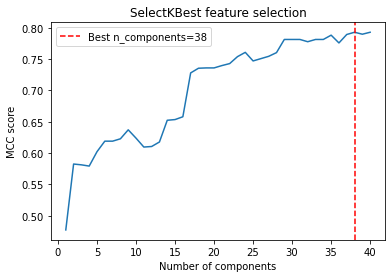

In [49]:
# Feature selection using SelectKBest 

# Define the range of number of components to test
n_components_range = range(1, 41)

# Evaluate the models using logistic regression with MCC score
lr = LogisticRegression(random_state=42)
mcc_scores = []
for n_components in n_components_range:
    # Feature selection using PCA
    kbest = SelectKBest(f_classif, k=n_components)
    kbest.fit(X_train_scaled, y_train)
    X_train_kbest = kbest.transform(X_train_scaled)
    X_test_kbest = kbest.transform(X_test_scaled)

    lr.fit(X_train_kbest, y_train)
    y_pred = lr.predict(X_test_kbest)
    mcc = matthews_corrcoef(y_test, y_pred)
    mcc_scores.append(mcc)
    
# Find the best value of n_components based on MCC score
best_n_components = n_components_range[np.argmax(mcc_scores)]

# Plot the results
plt.plot(n_components_range, mcc_scores)
plt.xlabel('Number of components')
plt.ylabel('MCC score')
plt.title('SelectKBest feature selection')
plt.axvline(best_n_components, linestyle='--', color='r', label=f'Best n_components={best_n_components}')
plt.legend()
plt.show()

kbest = SelectKBest(f_classif, k=best_n_components)
kbest.fit(X_train_scaled, y_train)
X_train_kbest = kbest.transform(X_train_scaled)
X_test_kbest = kbest.transform(X_test_scaled)

***
### SequentialFeatureSelection

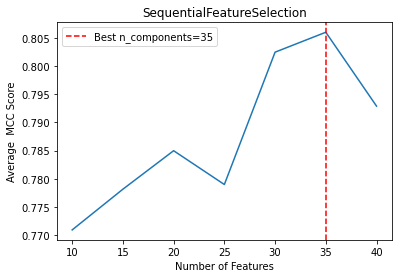

In [51]:
from sklearn.feature_selection import SequentialFeatureSelector
# Define a range of the number of features to consider(for performance purpose)
n_features_range = [10, 15, 20, 25, 30, 35, 40]

# Create an empty list to store the average cross-validation scores
mcc_scores = []
scorer = make_scorer(matthews_corrcoef)

clf = LogisticRegression(random_state=42, max_iter=10000)

# Iterate over the number of features and perform cross-validation for each number of features
for n_features in n_features_range:
    sfs = SequentialFeatureSelector(clf, n_features_to_select=n_features, scoring=scorer)
    sfs.fit(X_train_scaled, y_train)
    X_train_sfs = sfs.transform(X_train_scaled)
    X_test_sfs = sfs.transform(X_test_scaled)
    clf.fit(X_train_sfs, y_train)
    y_pred_sfs = clf.predict(X_test_sfs)
    mcc = matthews_corrcoef(y_pred_sfs, y_test)
    mcc_scores.append(mcc)
    

# Find the best value of n_components based on MCC score
best_n_components = n_features_range[np.argmax(mcc_scores)]

# Plot the average cross-validation scores against the number of features
plt.plot(n_features_range, mcc_scores)
plt.xlabel('Number of Features')
plt.ylabel('Average  MCC Score')
plt.title('SequentialFeatureSelection')
plt.axvline(best_n_components, linestyle='--', color='r', label=f'Best n_components={best_n_components}')
plt.legend()
plt.show()


In [52]:
#Optimal number of features is 35
sfs = SequentialFeatureSelector(clf, n_features_to_select=35, scoring=scorer)
sfs.fit(X_train_scaled, y_train)
X_train_sfs = sfs.transform(X_train_scaled)
X_test_sfs = sfs.transform(X_test_scaled)

***
### Checking the best MCC score for the selectors
Also compared with no feature selection


In [53]:
# Evaluate the models using logistic regression with MCC score
lr = LogisticRegression(random_state=42)
models = [("Pearson", X_train_corr, X_test_corr),
          ("PCA", X_train_pca, X_test_pca),
          ("SelectKBest", X_train_kbest, X_test_kbest),
          ("SequentialFeatureSelection", X_train_sfs, X_test_sfs)]

# Printing MCC score without feature selectors
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Without feature selectors: MCC score = {mcc:.4f}")

# Printing MCC scores for feature selectors
for name, X_train_fs, X_test_fs in models:
    lr.fit(X_train_fs, y_train)
    y_pred = lr.predict(X_test_fs)
    mcc = matthews_corrcoef(y_test, y_pred)
    print(f"{name} with: MCC score = {mcc:.4f}")

Without feature selectors: MCC score = 0.7961
Pearson with: MCC score = 0.2142
PCA with: MCC score = 0.8057
SelectKBest with: MCC score = 0.7929
SequentialFeatureSelection with: MCC score = 0.8060


***
### Now onto selecting the best model

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Best Imputer, Scaler and Selector 
imputer = IterativeImputer(random_state=42)
scaler = StandardScaler()
selector = SequentialFeatureSelector(clf, n_features_to_select=35, scoring=scorer)

# Impute missing values
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale features
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Feature selection 
selector.fit(X_train_scaled, y_train)
X_train_kbest = selector.transform(X_train_scaled)
X_test_kbest = selector.transform(X_test_scaled)


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Define grid of hyperparameters to test
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Perform grid search with cross-validation
scorer = make_scorer(matthews_corrcoef)
cv = GridSearchCV(dtc, param_grid=param_grid, scoring=scorer, cv=5)
cv.fit(X_train_kbest, y_train)

# Print the best hyperparameters and performance score
print("Best hyperparameters:", cv.best_params_)

# Evaluate the model with best hyperparameters on the test set
y_pred = cv.predict(X_test_kbest)

# Check classification scores
print('\n')
classification_scores(y_test, y_pred)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}


              precision    recall  f1-score   support

          RB       0.85      0.76      0.80       189
         NRB       0.96      0.98      0.97      1016

    accuracy                           0.94      1205
   macro avg       0.90      0.87      0.88      1205
weighted avg       0.94      0.94      0.94      1205

The Matthews correlation coefficient is:  0.7685
Confusion matrix:
 [[143  46]
 [ 25 991]]


In [56]:
from sklearn.metrics import classification_report

# create a Random Forest classifier object
rfc = RandomForestClassifier(random_state=42)

# define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# create a GridSearchCV object
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring=scorer)

# fit the GridSearchCV object to the training data
grid_search.fit(X_train_kbest, y_train)

# print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

# make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_kbest)

# Check classification scores
classification_scores(y_test, y_pred)

Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
              precision    recall  f1-score   support

          RB       0.90      0.83      0.87       189
         NRB       0.97      0.98      0.98      1016

    accuracy                           0.96      1205
   macro avg       0.94      0.91      0.92      1205
weighted avg       0.96      0.96      0.96      1205

The Matthews correlation coefficient is:  0.8421
Confusion matrix:
 [[157  32]
 [ 17 999]]


In [57]:
# Create a SVC classifier
svc = SVC(random_state=42)

# define the parameter grid to search over
param_grid = {
    "gamma": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 
    "C": [0.01, 0.1, 1, 10, 100, 1000, 10000]
    }

# fit the GridSearchCV object to the training data
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring=scorer)
grid_search = grid_search.fit(X_train_kbest, y_train)

# print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

# make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_kbest)

# Check classification scores
classification_scores(y_test, y_pred)

Best hyperparameters: {'C': 100, 'gamma': 0.1}
              precision    recall  f1-score   support

          RB       0.90      0.87      0.89       189
         NRB       0.98      0.98      0.98      1016

    accuracy                           0.97      1205
   macro avg       0.94      0.93      0.93      1205
weighted avg       0.96      0.97      0.96      1205

The Matthews correlation coefficient is:  0.8667
Confusion matrix:
 [[165  24]
 [ 18 998]]


In [58]:
# Define the hyperparameters and their possible values
hyperparameters = {
    'C': [0.1, 1.0, 10.0],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty type
    'solver': ['liblinear', 'saga'],  # Solver algorithm
    'max_iter': [100, 200, 500, 1000, 10000]  # Maximum number of iterations
}

# Create a logistic regression model
logistic_regression = LogisticRegression()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(logistic_regression, hyperparameters, cv=5, scoring=scorer)
grid_search.fit(X_train_kbest, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the validation set using MCC
y_pred = best_model.predict(X_test_kbest)
classification_scores(y_test, y_pred)

Best hyperparameters: {'C': 10.0, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
              precision    recall  f1-score   support

          RB       0.91      0.76      0.83       189
         NRB       0.96      0.99      0.97      1016

    accuracy                           0.95      1205
   macro avg       0.93      0.87      0.90      1205
weighted avg       0.95      0.95      0.95      1205

The Matthews correlation coefficient is:  0.8060
Confusion matrix:
 [[ 144   45]
 [  14 1002]]


In [59]:
from sklearn.neighbors import KNeighborsClassifier
#Create a KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid to search over
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring=scorer)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_kbest, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_kbest)

# Check classification scores
classification_scores(y_test, y_pred)

Best hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
              precision    recall  f1-score   support

          RB       0.94      0.79      0.86       189
         NRB       0.96      0.99      0.98      1016

    accuracy                           0.96      1205
   macro avg       0.95      0.89      0.92      1205
weighted avg       0.96      0.96      0.96      1205

The Matthews correlation coefficient is:  0.8365
Confusion matrix:
 [[ 149   40]
 [  10 1006]]


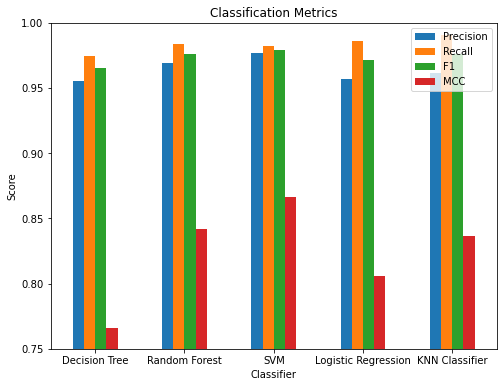

The best classifier is SVM, with the MCC score of 0.86665


In [60]:
# define classifiers
classifiers = [('Decision Tree', DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4, min_samples_split=2, random_state=42)),
               ('Random Forest', RandomForestClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42)),
               ('SVM', SVC(C=100, gamma=0.1, random_state=42)),
               ('Logistic Regression', LogisticRegression(C=10.0, max_iter=500, solver='saga', penalty='l1', random_state=42)),
               ('KNN Classifier', KNeighborsClassifier(n_neighbors=3, p=1, weights='distance'))]

# evaluate classifiers using precision, recall, f1, and MCC metrics
metrics = ['Precision', 'Recall', 'F1', 'MCC']
results = pd.DataFrame(columns=metrics, index=[name for name, clf in classifiers])

for name, clf in classifiers:
    clf.fit(X_train_kbest, y_train)
    y_pred = clf.predict(X_test_kbest)
    results.loc[name, 'Precision'] = precision_score(y_test, y_pred)
    results.loc[name, 'Recall'] = recall_score(y_test, y_pred)
    results.loc[name, 'F1'] = f1_score(y_test, y_pred)
    results.loc[name, 'MCC'] = matthews_corrcoef(y_test, y_pred)

# plot results
fig, ax = plt.subplots(figsize=(8, 6))
results.plot(kind='bar', ax=ax)
ax.set_ylim([0.75, 1.0])
ax.set_xlabel('Classifier')
ax.set_ylabel('Score')
ax.set_title('Classification Metrics')
plt.xticks(rotation=0)
plt.show()

# print best classifier and its F1 score
results['MCC'] = results['MCC'].astype(float)
best_classifier = results['MCC'].idxmax()
best_score = results.loc[best_classifier, 'MCC']
print(f'The best classifier is {best_classifier}, with the MCC score of {best_score:.5f}')

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
# Create the pipeline
pipeline = Pipeline([
    ('imputer', IterativeImputer(random_state=42)),
    ('scaler', StandardScaler()),
    ('feature_selector', SequentialFeatureSelector(clf, n_features_to_select=35, scoring=scorer)),
    ('classifier', SVC(C=100, gamma=0.1, random_state=42))
])


pipeline.fit(X_search, y_search)
y_pred_final = pipeline.predict(X_final)

# Calculate Matthews correlation coefficient
mcc = matthews_corrcoef(y_final, y_pred_final)
print("Matthews Correlation Coefficient:", mcc)

# Display classification report
report = classification_report(y_final, y_pred_final, target_names=['RB', 'NRB'])
print("Classification Report:")
print(report)

Matthews Correlation Coefficient: 0.8913191125439559
Classification Report:
              precision    recall  f1-score   support

          RB       0.90      0.92      0.91       153
         NRB       0.98      0.98      0.98       760

    accuracy                           0.97       913
   macro avg       0.94      0.95      0.95       913
weighted avg       0.97      0.97      0.97       913

